In [209]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns   

In [269]:
seed=123

In [211]:
data=pd.read_csv('C:/Users/student/Downloads/데이터들/agaricus-lepiota.data', header=None)

In [212]:
data.shape # 8124, 23

(8124, 23)

In [214]:
data[0].value_counts() # p,e
data[1].value_counts() # x f k b s c
data[2].value_counts() # y s f g
data[3].value_counts() # n g e y w b p c r u
data[4].value_counts() # f t
data[5].value_counts() # n f s y l a p c m 
data[6].value_counts() # f a
data[7].value_counts() # c w
data[8].value_counts() # b n
data[9].value_counts() # b p w n g h u k e y o r
data[10].value_counts() # te
data[11].value_counts() # b ? e c r   => ? NaN
data[12].value_counts() # s k f y
data[13].value_counts() # s k f y
data[14].value_counts() # w p g n b o e c y
data[15].value_counts() # w p g n b o e c y
data[16].value_counts() # p
data[17].value_counts() # w n o y
data[18].value_counts() # o t n
data[19].value_counts() # p e l f n
data[20].value_counts() # w n k h r u b o y
data[21].value_counts() # v y s n a c
data[22].value_counts() # d g p l u m w

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: 22, dtype: int64

In [215]:
data[0].value_counts()
data[0].replace({'e':0,'p':1},inplace=True)

In [216]:
data[4].value_counts()
data[4].replace({'f':1,'t':0}, inplace=True)

In [217]:
data[6].value_counts()
data[6].replace({'f':1,'a':0}, inplace=True)

In [218]:
data[7].value_counts()
data[7].replace({'c':1,'w':0}, inplace=True)

In [219]:
data[8].value_counts()
data[8].replace({'b':1,'n':0}, inplace=True)

In [220]:
data[10].value_counts()
data[10].replace({'t':1,'e':0}, inplace=True)

In [221]:
data[16].value_counts()
data[16].replace('p',1,inplace=True)

In [222]:
data[11].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: 11, dtype: int64

In [223]:
data.columns=['Poisoned','cap_shape','cap_surface','cap_color','bruises',
             'odor','gill_attachment','gill_spacing','gill_size','gill_color',
             'stalk_shape','stalk_root','stalk_surface_above','stalk_surface_below',
             'stalk_color_above','stalk_color_below','veil_type','veil_color',
             'ring_number','ring_type','spore_point_color','population','habitat']

In [224]:
data.head()

,Poisoned,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below,stalk_color_above,stalk_color_below,veil_type,veil_color,ring_number,ring_type,spore_point_color,population,habitat
0,1,x,s,n,0,p,1,1,0,k,...,s,w,w,1,w,o,p,k,s,u
1,0,x,s,y,0,a,1,1,1,k,...,s,w,w,1,w,o,p,n,n,g
2,0,b,s,w,0,l,1,1,1,n,...,s,w,w,1,w,o,p,n,n,m
3,1,x,y,w,0,p,1,1,0,n,...,s,w,w,1,w,o,p,k,s,u
4,0,x,s,g,1,n,1,0,1,k,...,s,w,w,1,w,o,e,n,a,g


In [225]:
onehot_data=pd.get_dummies(data, drop_first=True)
onehot_data.shape # 8124, 113

(8124, 97)

In [226]:
onehot_data.head()

,Poisoned,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,veil_type,cap_shape_c,cap_shape_f,cap_shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [227]:
onehot_data.corr()

,Poisoned,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,veil_type,cap_shape_c,cap_shape_f,cap_shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
Poisoned,1.000000,0.501530,0.129200,0.348387,-0.540024,-0.102019,NaN,0.023007,0.018526,0.163565,...,-0.219529,-0.159572,0.443722,-0.107055,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
bruises,0.501530,1.000000,-0.137359,-0.299473,-0.369596,-0.099364,NaN,-0.003803,-0.045188,0.229578,...,-0.103639,-0.072997,0.179268,-0.162030,0.131746,0.278238,-0.228986,0.249460,-0.143017,-0.184507
gill_attachment,0.129200,-0.137359,1.000000,-0.071489,-0.108984,0.186485,NaN,0.003615,0.043740,-0.083575,...,0.037070,0.069399,0.013080,0.084172,0.097662,-0.436199,0.031453,0.065947,0.035483,0.025344
gill_spacing,0.348387,-0.299473,-0.071489,1.000000,-0.108333,-0.080895,NaN,-0.050573,0.039154,0.019591,...,-0.122756,-0.347365,0.308043,0.226770,-0.537841,0.077632,0.084739,0.177670,0.095595,0.068279
gill_size,-0.540024,-0.369596,-0.108984,-0.108333,1.000000,-0.214576,NaN,-0.033174,0.075766,-0.306333,...,0.152251,0.119577,-0.506475,0.298685,0.323808,-0.336217,0.129183,-0.170190,-0.141152,0.104090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.155150,0.278238,-0.436199,0.077632,-0.336217,0.085287,NaN,0.065707,-0.052326,0.235108,...,-0.076868,-0.143906,0.248675,-0.174539,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,-0.138627,-0.228986,0.031453,0.084739,0.129183,-0.221048,NaN,-0.004286,-0.129312,-0.065047,...,0.347262,0.152473,-0.144434,-0.099772,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,0.323346,0.249460,0.065947,0.177670,-0.170190,-0.052059,NaN,-0.008985,0.021891,0.090538,...,-0.092129,-0.125366,0.169228,0.040714,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,0.112078,-0.143017,0.035483,0.095595,-0.141152,-0.077334,NaN,-0.004835,0.030636,-0.073380,...,-0.049569,0.130450,0.001180,-0.042888,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


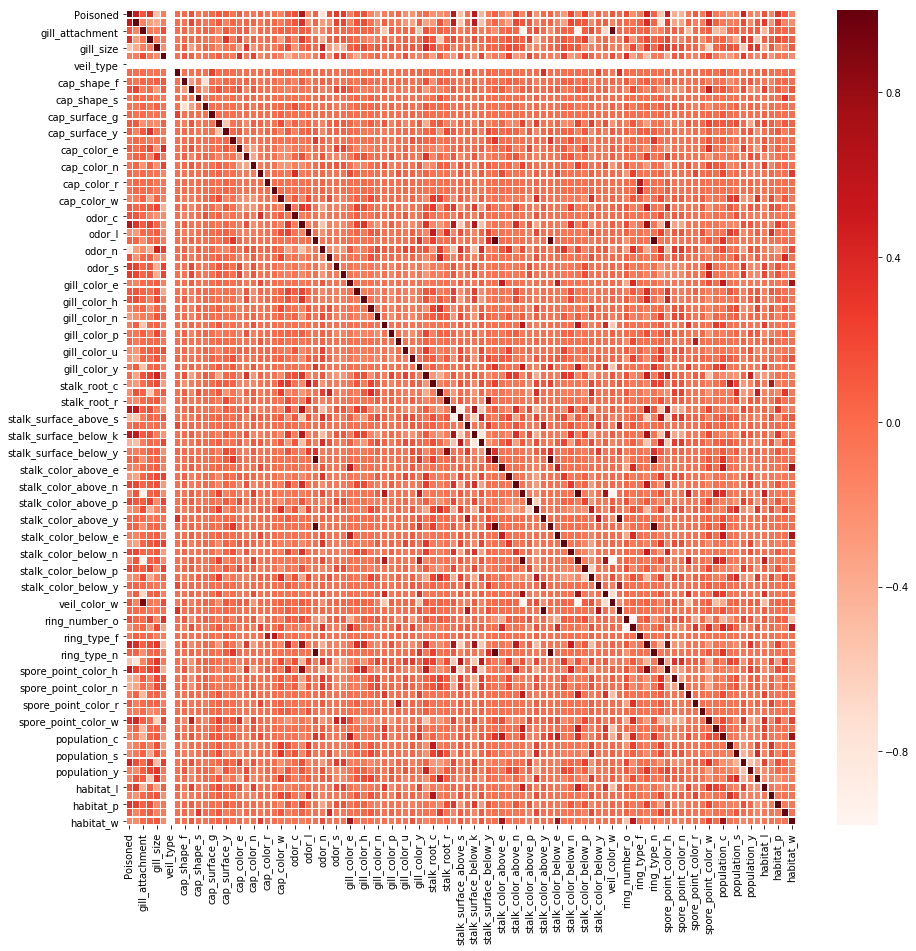

In [228]:
plt.figure(figsize=(15,15))
sns.heatmap(data=onehot_data.corr(),fmt='.2f',linewidths=.5, cmap='Reds')

In [274]:
onehot_data.shape

(8124, 97)

In [255]:
ohe_data=onehot_data.as_matrix()
ohe_data.shape

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(8124, 97)

In [267]:
y_data=np.array(ohe_data[:,[0]])
y_data.shape

(8124, 1)

In [276]:
x_data=ohe_data[:,1:]
x_data.shape

(8124, 96)

In [277]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=1004)

In [280]:
x=tf.placeholder(tf.float32, shape=[None,96])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([96,1]))
b=tf.Variable(tf.random_normal([1]))

In [281]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [282]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [283]:
predicted=tf.cast(hf>0.5, dtype=tf.float32)

In [284]:
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [293]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv, _=sess.run([cost, train], feed_dict={x:x_train, y:y_train})
        
        if step%200==0:
            print(step, cv)
    _,pv,av=sess.run([hf, predicted, accuracy], feed_dict={x:x_test, y:y_test})
    print("정확도 : ",av)
    

0 1.7389859
200 0.9545001
400 0.6764212
600 0.5253217
800 0.4344603
1000 0.3747878
1200 0.33277473
1400 0.3015807
1600 0.277456
1800 0.258199
2000 0.24243684
2200 0.22927105
2400 0.21808778
2600 0.20845431
2800 0.2000545
3000 0.19265272
3200 0.18606927
3400 0.1801639
3600 0.17482674
3800 0.16996971
4000 0.16552164
4200 0.16142425
4400 0.1576298
4600 0.15409873
4800 0.1507978
5000 0.14769909
5200 0.14477912
5400 0.14201786
5600 0.1393981
5800 0.1369053
6000 0.13452658
6200 0.13225104
6400 0.13006914
6600 0.1279724
6800 0.12595372
7000 0.12400661
7200 0.12212535
7400 0.12030495
7600 0.11854099
7800 0.11682938
8000 0.11516662
8200 0.11354958
8400 0.11197535
8600 0.110441454
8800 0.10894551
9000 0.10748553
9200 0.106059454
9400 0.104665786
9600 0.10330271
9800 0.10196892
10000 0.10066314
정확도 :  0.9811321


In [294]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [511]:
print('accuracy : {:.2f}'.format(knn.score(x_test, y_test)))

accuracy : 1.00


### 2. 아파트 관리비 분석
#### (1) 관리비 구성
- 공용관리비=일반관리비+청소비+경비비+소독비+승강기유지비+수선유지비
- 일반관리비=인건비+제세공과금
- 제세공과금=통신료+제세공과금등
#### (2) 공용관리비 항목에 대해 아래와 같은 분석을 실시하시오.
1) 일반관리비, 청소비, 경비비, 소독비, 승강기유지비, 수선유지비 각 항목에 대해 공용관리비에서 차지하는 비중의 변화가 어떠한지 연도별로 분석하시오.(시각화)
2) 공용관리비를 줄이고자 한다고 가정했을때, 일반관리비(인건비 제외), 청소비, 경비비, 소독비, 승강기유지비, 수선유지비 항목중 증가되는 비율이 가장 높은 항목(비용을 줄여야 하는 항목)은 무엇인가?(시각화)
3) 특정 연도에  과다 청구된 해가 있는지 조사하시오.(시각화)
#### (3) 일반관리비 항목에 대해 아래와 같은 분석을 실시하시오.
1) 인건비, 제사무비, 제세공과금, 피복비, 교육훈련비, 차량유지비, 그밖의부대비용 각 항목에 대해 일반관리비에서 차지하는 비중의 변화가 어떠한지 연도별로 분석하시오.(시각화)
2) 특정 연도에  과다 청구된 해가 있는지 조사하시오.(시각화)


In [304]:
data_2012=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2012년.xls")
data_2013=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2013년.xls")
data_2014=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2014년.xls")
data_2015=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2015년.xls")
data_2016=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2016년.xls")
data_2017=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2017년.xls")
data_2018=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2018년.xls")
data_2019=pd.read_excel("C:/Users/student/Downloads/데이터들/아파트관리비분석용 데이터셋/2019년.xls")

In [310]:
data_2012.head()

,분류,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계
0,공용관리비,54806922,0,54153422,48754473,48433523,52126683,0,50731563,0,50640583,50418913,52799003,462865085
1,일반관리비,18603990,0,18393390,17301090,17056590,19043140,0,18455580,0,18586700,18359030,18967090,164766600
2,인건비,17551630,0,17145730,16076710,15785460,17418760,0,17418180,0,17523180,17338180,17428180,153686010
3,급여,0,0,0,0,0,0,0,0,0,0,0,0,0
4,제수당,0,0,0,0,0,0,0,0,0,0,0,0,0


In [308]:
data_list=[data_2012,data_2013,data_2014,data_2015,data_2016,data_2017,data_2018,data_2019]

In [413]:
year=201201
for data in data_list:
    data.columns=['분류',1,2,3,4,5,6,7,8,9,10,11,12,'합계']

In [415]:
data_2012.head()
data_2013.head()

,분류,1,2,3,4,5,6,7,8,9,10,11,12,합계
0,공용관리비,53703285,51960765,51274835,51657755,51368055,51209845,51064305,52030195,51380325,51959685,0,52335335,569944385
1,일반관리비,18727540,18413320,17652280,17763610,18666610,18620200,17887260,18168350,18016180,18668540,0,18825540,201409430
2,인건비,17283360,17405020,16413490,16704770,17357760,17381570,16911870,17254430,17059660,17509090,0,17487790,188768810
3,급여,0,0,0,0,0,0,0,0,0,0,0,0,0
4,제수당,0,0,0,0,0,0,0,0,0,0,0,0,0


In [465]:
from matplotlib import font_manager, rc
from matplotlib import style

# plot하면 한글 글씨가 깨져서 처리
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [476]:
def graph_plot(normal, clean, guard, disinfection, lift, maintain, title):
    fig,ax=plt.subplots()
    fig.set_size_inches(9,5)
    plt.xticks(rotation = - 45 )
    plt.plot(normal,'red')
    plt.plot(clean,'blue')
    plt.plot(guard,'green')
    plt.plot(disinfection,'orange')
    plt.plot(lift,'pink')
    plt.plot(maintain,'y')
    ax.set_ylabel('공용관리비에 대한 비중')
    ax.set_xlabel("월")
    ax.set_title(title)
    plt.legend(['일반관리비','청소비','경비비','소독비','승강기유지비','수선유지비'])

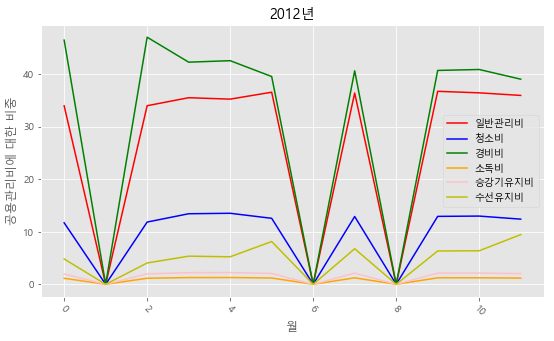

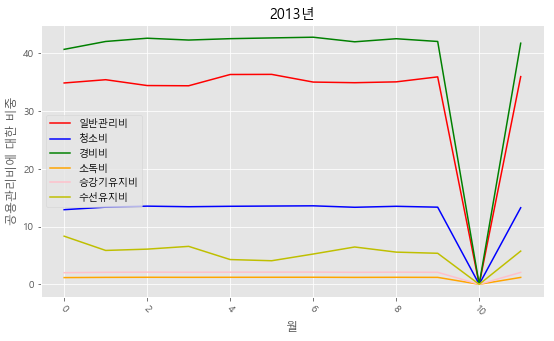

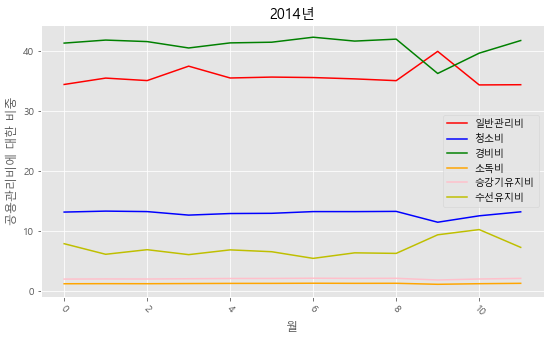

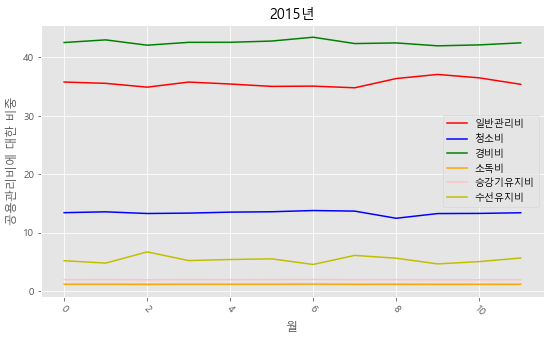

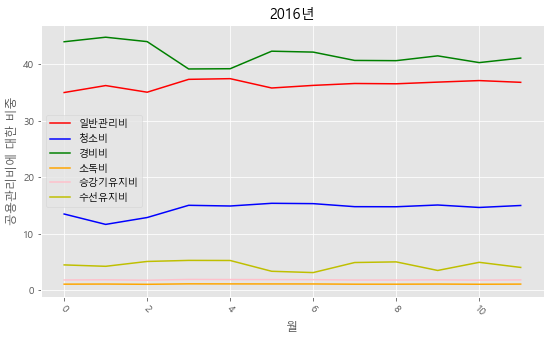

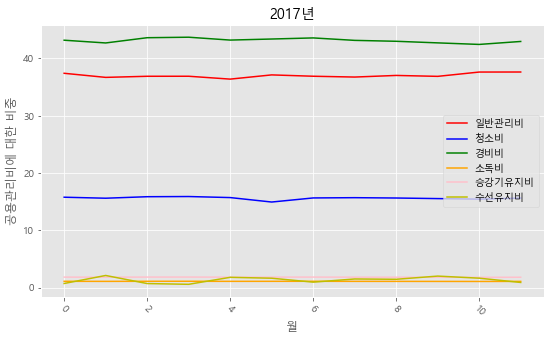

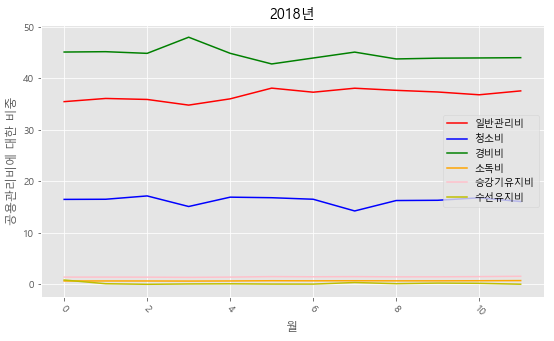

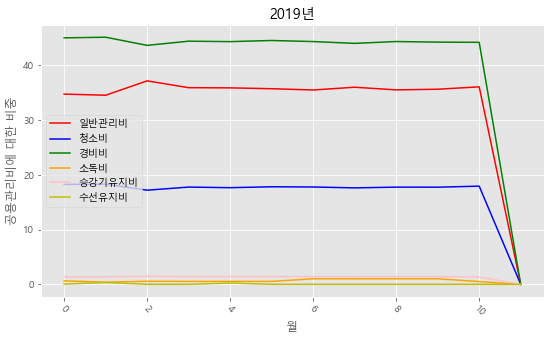

In [478]:
# 공용관리비 : 일반관리비+청소비+경비비+소독비+승강기유지비+수선유지비
cnt=0
title=['2012년','2013년','2014년','2015년','2016년','2017년','2018년','2019년']
for data in data_list:
    normal=[]
    clean=[]
    guard=[]
    disinfection=[]
    lift=[]
    maintain=[]
    public=[]
    for i in range(1,13):
        public.append(data[data['분류']=='공용관리비'][i].values[0])
        if public[i-1]==0:
            normal.append(0)
            clean.append(0)
            guard.append(0)
            disinfection.append(0)
            lift.append(0)
            maintain.append(0)
        else:
            normal.append(data[data['분류']=='일반관리비'][i].values[0]/public[i-1]*100)
            clean.append(data[data['분류']=='청소비'][i].values[0]/public[i-1]*100)
            guard.append(data[data['분류']=='경비비'][i].values[0]/public[i-1]*100)
            disinfection.append(data[data['분류']=='소독비'][i].values[0]/public[i-1]*100)
            lift.append(data[data['분류']=='승강기유지비'][i].values[0]/public[i-1]*100)
            maintain.append(data[data['분류']=='수선유지비'][i].values[0]/public[i-1]*100)
    graph_plot(normal, clean, guard, disinfection, lift, maintain, title[cnt])
    cnt+=1

### 1. 공용관리비
#### 1) 가장 많은 비중을 차지하는 것 : 경비비
#### 2) 증가되는 비율은 전년도와 다들 비슷
#### 3) 특정 연도에 과다 청구된 해가 있는지 조사하시오 : 없다.

In [508]:
def graph_plot(pay,expense,tax,clothes,training,car,internet,title):
    fig,ax=plt.subplots()
    fig.set_size_inches(9,5)
    plt.xticks(rotation = - 45 )
    plt.plot(pay,'red')
    plt.plot(expense,'blue')
    plt.plot(tax,'green')
    plt.plot(clothes,'orange')
    plt.plot(training,'pink')
    plt.plot(car,'y')
    plt.plot(internet,'black')
    ax.set_ylabel('일반관리비에 대한 비중')
    ax.set_xlabel("월")
    ax.set_title(title)
    plt.legend(['인건비','제사무비','제세공과금','피복비','교육훈련비','차량유지비','통신료'])

In [509]:
def not_pay_graph_plot(expense,tax,clothes,training,car,internet,title):
    category_names = ['expense','tax','clothes','training','car','internet']
    results = {
        '1월':[expense[0],tax[0],clothes[0],training[0],car[0],internet[0]],
        '2월':[expense[1],tax[1],clothes[1],training[1],car[1],internet[1]],
        '3월':[expense[2],tax[2],clothes[2],training[2],car[2],internet[2]],
        '4월':[expense[3],tax[3],clothes[3],training[3],car[3],internet[3]],
        '5월':[expense[4],tax[4],clothes[4],training[4],car[4],internet[4]],
        '6월':[expense[5],tax[5],clothes[5],training[5],car[5],internet[5]],
        '7월':[expense[6],tax[6],clothes[6],training[6],car[6],internet[6]],
        '8월':[expense[7],tax[7],clothes[7],training[7],car[7],internet[7]],
        '9월':[expense[8],tax[8],clothes[8],training[8],car[8],internet[8]],
        '10월':[expense[9],tax[9],clothes[9],training[9],car[9],internet[9]],
        '11월':[expense[10],tax[10],clothes[10],training[10],car[10],internet[10]],
        '12월':[expense[11],tax[11],clothes[11],training[11],car[11],internet[11]],
        
    }


    def survey(results, category_names):

        labels = list(results.keys())
        data = np.array(list(results.values()))
        data_cum = data.cumsum(axis=1)
        category_colors = plt.get_cmap('RdYlGn')(
            np.linspace(0.15, 0.85, data.shape[1]))

        fig, ax = plt.subplots(figsize=(9.2, 5))
        ax.invert_yaxis()
        ax.xaxis.set_visible(False)
        ax.set_xlim(0, np.sum(data, axis=1).max())

        for i, (colname, color) in enumerate(zip(category_names, category_colors)):
            widths = data[:, i]
            starts = data_cum[:, i] - widths
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)
            xcenters = starts + widths / 2

            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
            for y, (x, c) in enumerate(zip(xcenters, widths)):
                ax.text(x, y, str(int(c)), ha='center', va='center',
                        color=text_color)
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='small')

        return fig, ax


    survey(results, category_names)
    plt.show()

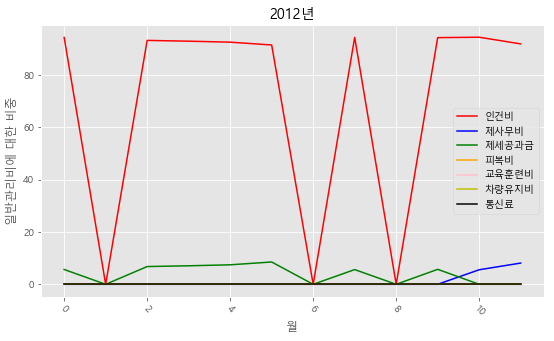

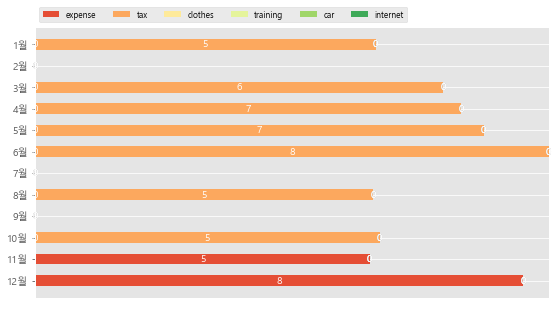

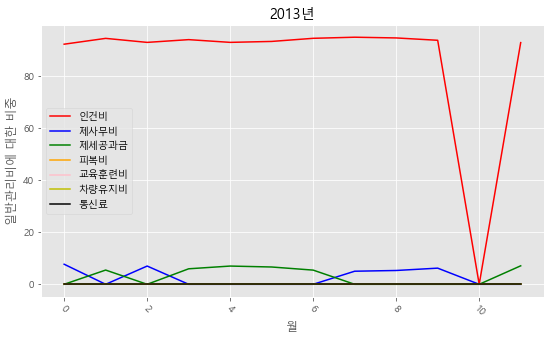

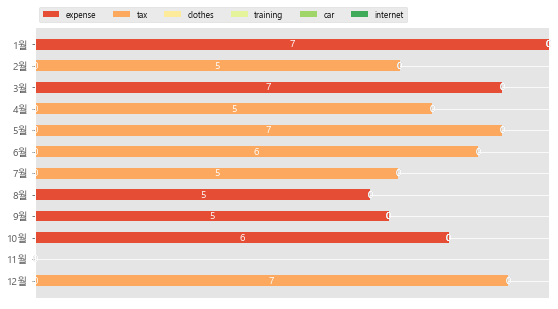

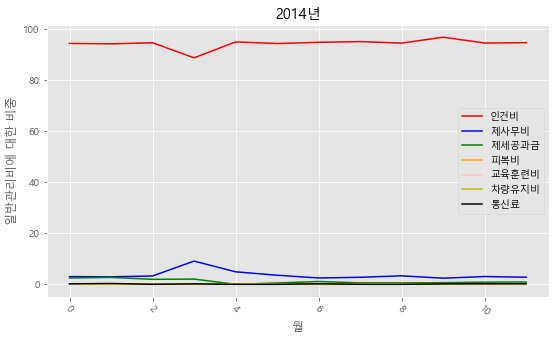

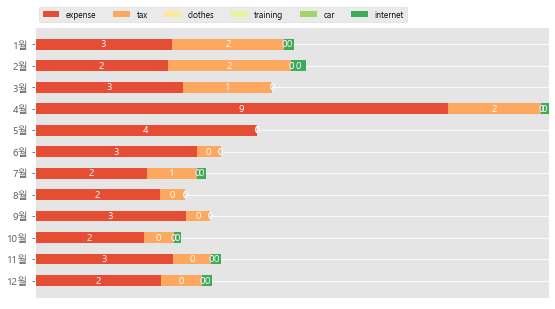

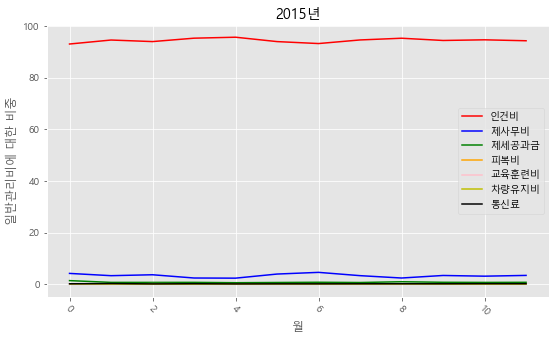

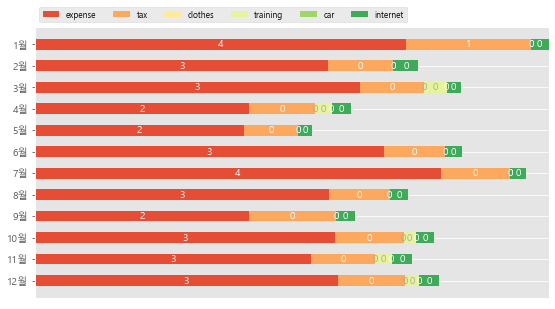

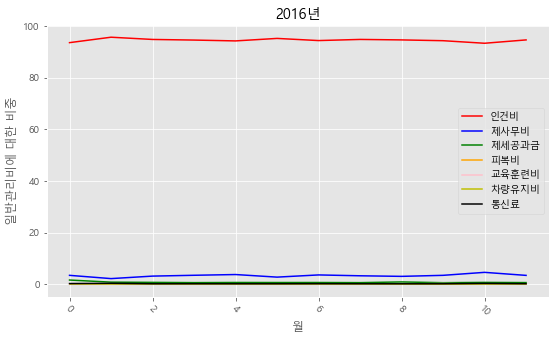

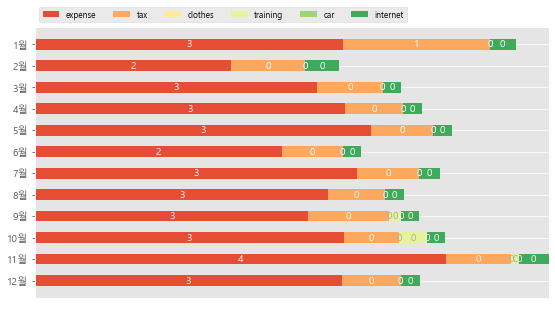

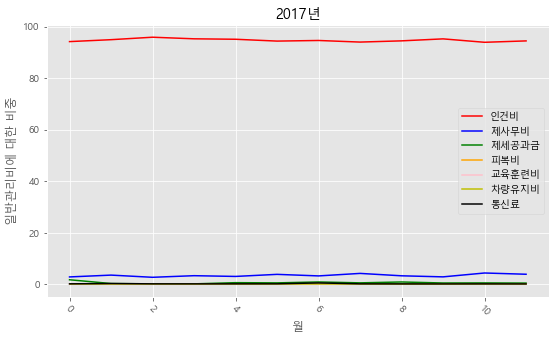

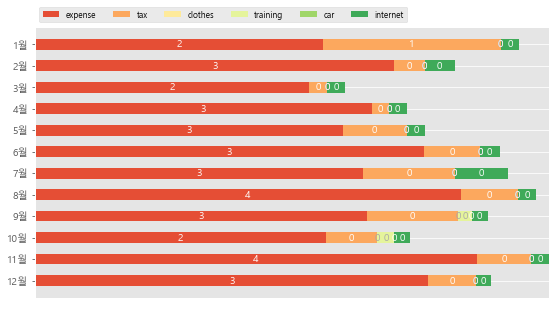

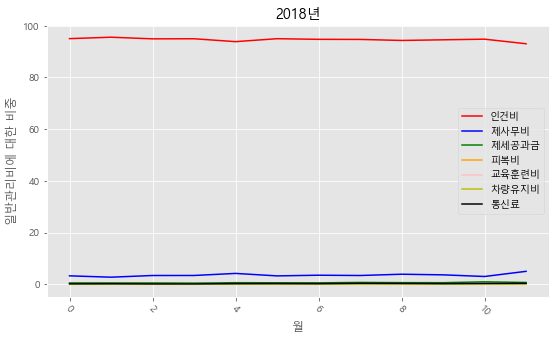

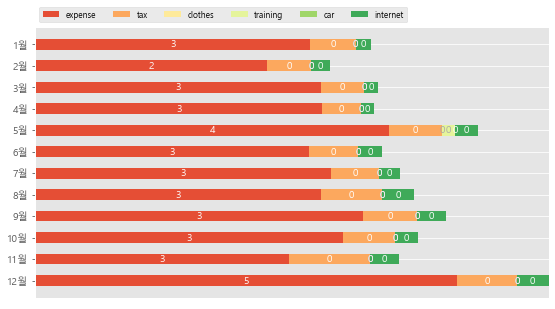

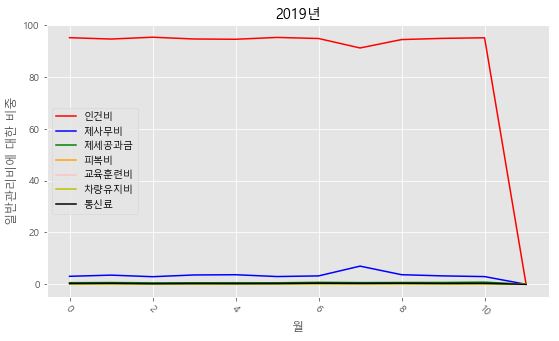

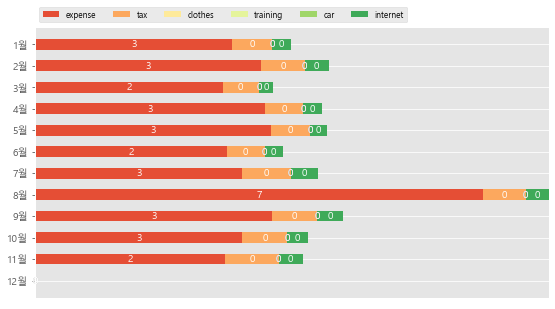

In [510]:
# 일반관리비 : 인건비+제사무비+제세공과금+피복비+교육훈련비+차량유지비+통신료
cnt=0
title=['2012년','2013년','2014년','2015년','2016년','2017년','2018년','2019년']
for data in data_list:
    normal=[]
    pay=[]
    expense=[]
    tax=[]
    clothes=[]
    training=[]
    car=[]
    internet=[]
    for i in range(1,13):
        normal.append(data[data['분류']=='일반관리비'][i].values[0])
        if normal[i-1]==0:
            pay.append(0)
            expense.append(0)
            tax.append(0)
            clothes.append(0)
            training.append(0)
            car.append(0)
            internet.append(0)
        else:
            pay.append(data[data['분류']=='인건비'][i].values[0]/normal[i-1]*100)
            expense.append(data[data['분류']=='제사무비'][i].values[0]/normal[i-1]*100)
            tax.append(data[data['분류']=='제세공과금'][i].values[0]/normal[i-1]*100)
            clothes.append(data[data['분류']=='피복비'][i].values[0]/normal[i-1]*100)
            training.append(data[data['분류']=='교육훈련비'][i].values[0]/normal[i-1]*100)
            car.append(data[data['분류']=='차량유지비'][i].values[0]/normal[i-1]*100)
            internet.append(data[data['분류']=='통신료'][i].values[0]/normal[i-1]*100)  
    graph_plot(pay,expense,tax,clothes,training,car,internet,title[cnt])
    not_pay_graph_plot(expense,tax,clothes,training,car,internet,title[cnt])
    cnt+=1

In [ ]:
2. 2012, 2013년도에 제세공과금이 많이 청구 됨